In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading and Preprocessing the Data

In [2]:
airline = pd.read_csv(r"C:\Users\JIMMY ULAHANNAN\Downloads\Time Series Code Data\airline_passengers.csv",index_col="Month")

In [3]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [4]:
airline.dropna(inplace=True)

In [5]:
airline.index = pd.to_datetime(airline.index)

In [6]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Simple Moving Average

In [7]:
airline['6-month-sma'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [8]:
airline['12-month-sma'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

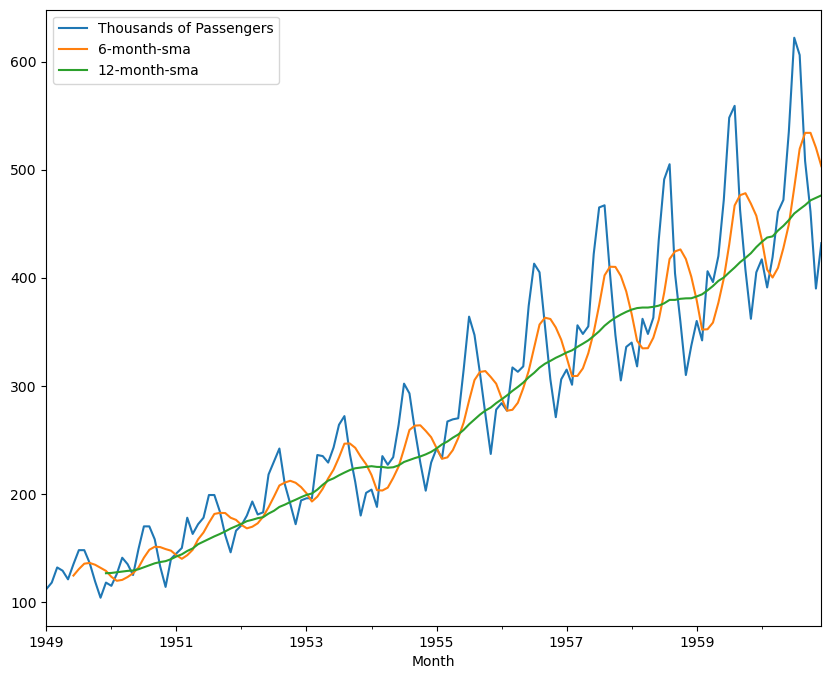

In [9]:
airline.plot(figsize=(10,8))

In [10]:
airline.head(20)

,Thousands of Passengers,6-month-sma,12-month-sma
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


### Exponentially Weighted Moving Average

In [11]:
airline['ewma-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

In [12]:
airline.head(20)

,Thousands of Passengers,6-month-sma,12-month-sma,ewma-12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,115.250000
1949-03-01,132,NaN,NaN,121.787529
1949-04-01,129,NaN,NaN,124.064224
1949-05-01,121,NaN,NaN,123.231685
1949-06-01,135,124.500000,NaN,126.092005
1949-07-01,148,130.500000,NaN,130.980697
1949-08-01,148,135.500000,NaN,134.532364
1949-09-01,136,136.166667,NaN,134.822714


<AxesSubplot:xlabel='Month'>

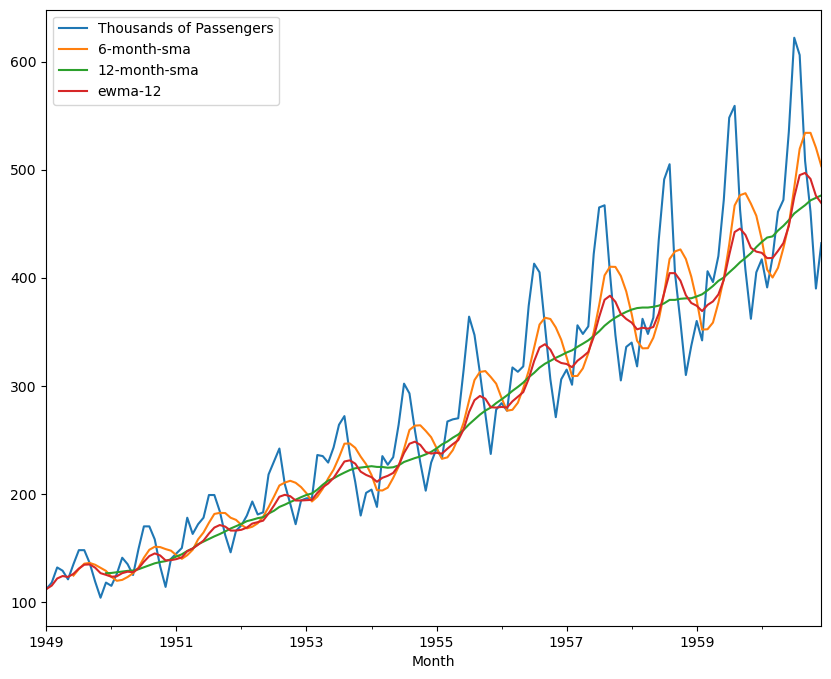

In [13]:
airline.plot(figsize=(10,8))

<AxesSubplot:xlabel='Month'>

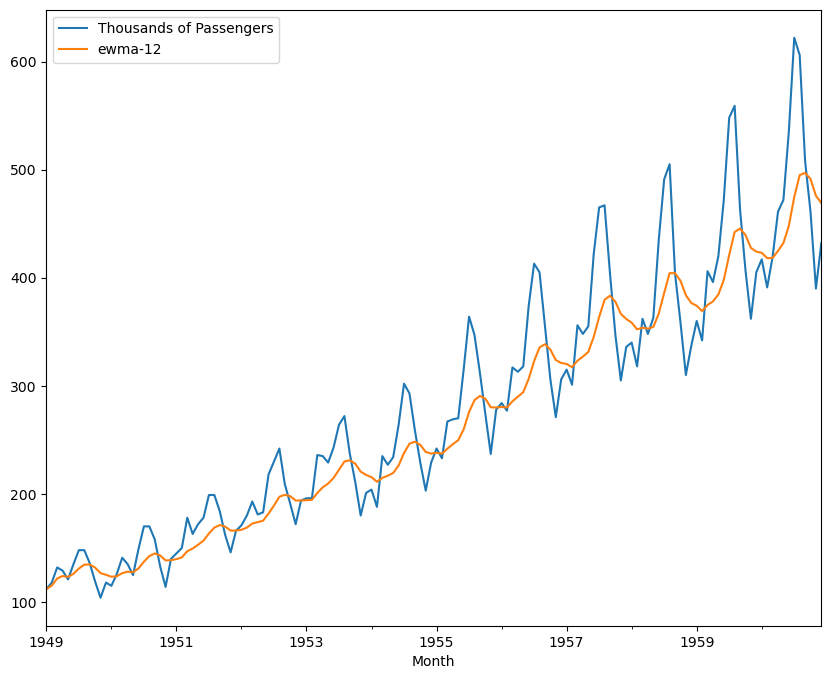

In [14]:
airline[['Thousands of Passengers','ewma-12']].plot(figsize=(10,8))

# Holt-Winter Method

### Loading and Preprocessing the Data

In [15]:
df = pd.read_csv(r"C:\Users\JIMMY ULAHANNAN\Downloads\Time Series Code Data\airline_passengers.csv",index_col="Month",parse_dates=True)

In [16]:
df = df.dropna()

In [17]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [18]:
df.index.freq = 'MS'

In [19]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [20]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Applying the Holt-Winters Exponential Smoothing Model

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [22]:
span = 12
alpha = 2/(span+1)

In [23]:
df['ewms12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [24]:
df.head()

,Thousands of Passengers,ewms12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [25]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [26]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [27]:
df['se12'] = fitted_model.fittedvalues.shift(-1)

In [28]:
df.head()

,Thousands of Passengers,ewms12,se12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


Implementing the Model

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [30]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [31]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

In [32]:
df.head()

,Thousands of Passengers,ewms12,se12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


In [33]:
df.columns

Index(['Thousands of Passengers', 'ewms12', 'se12', 'DES_add_12',
       'DES_mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

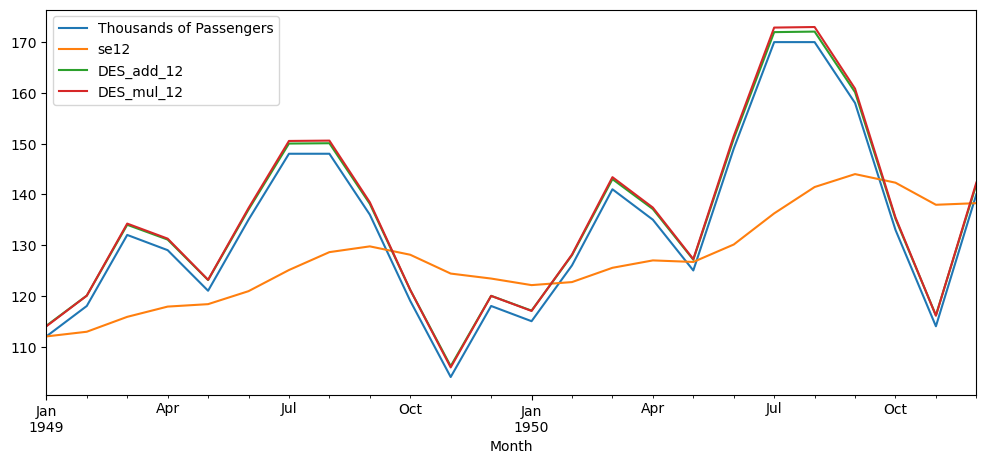

In [34]:
df[['Thousands of Passengers', 'se12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5))

In [35]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)

C:\Users\JIMMY ULAHANNAN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='Month'>

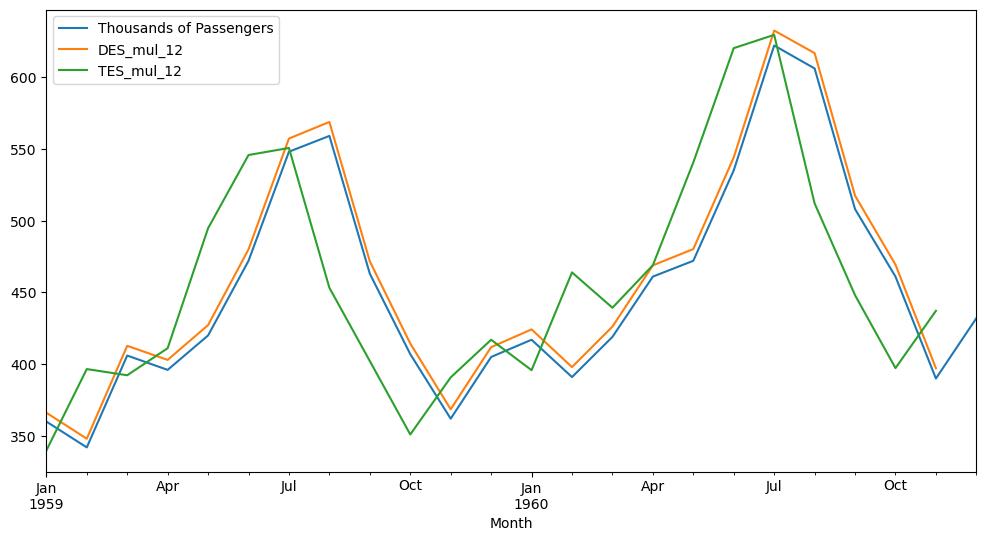

In [39]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12,6))

In [37]:
df.head()

,Thousands of Passengers,ewms12,se12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,118.842954
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,133.333217
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,127.901748
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,120.980377
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,133.905245


<AxesSubplot:xlabel='Month'>

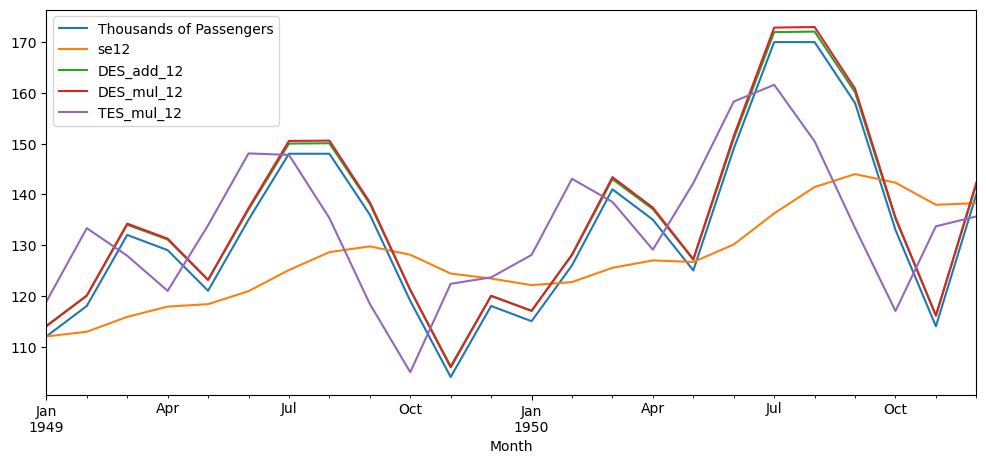

In [36]:
df[['Thousands of Passengers', 'se12', 'DES_add_12','DES_mul_12','TES_mul_12']].iloc[:24].plot(figsize=(12,5))